# Week 3 Assignment: Cat Classification

-------

## <font color="red"> <참고사항> 

### 3주차와 4주차의 과제 난이도가 입문자들에게는 매우 높습니다. 그럼에도 하는 이유가 뭘까요?
    
#### 1. Neural Network의 구조에 대해 어느 정도 알아야 tensorflow로 구현할 수 있습니다.
- 하지만 5주차 초반부까지 가야 Neural Network의 구조에 대해 다 배웁니다.
    
- 그래서 실질적으로 더 열심히 하셔야 하는 과제는 5주차 이후의 과제들입니다.
 
#### 2. 그 전까지는 여러분들이 python과 numpy에 대해 실습을 통해 공부할 필요가 있습니다.
- 3~4주차 과제를 하시면서 모르는 부분들이 많을 것입니다.
    
- 이 부분을 직접 찾아보거나 튜터에게 질문을 하며 과제를 구현하게 되면 향후 python 실력이 5주차 실습을 하기에 충분해집니다.
    
#### 3. 또한, 이 과제는 코세라 내용을 기반으로 하기 때문에 배운 내용을 간접적으로 한 번 더 복습할 수 있는 계기가 됩니다.
    
### <font color="coral"> **결론 1:** python 공부와 강의 복습을 목적으로 이 과제를 최대한 해결하되 
### <font color="coral"> 과제를 다 해결하지 못해도 tensorflow 구조가 이보다 쉽기 때문에 충분히 5주차 이후 실습이 가능합니다.
    
    
### <font color="coral"> **결론 2:** 빈칸이 이외의 셀은 알지 못해도 됩니다. (필요한 부분은 수업시간에 안내합니다.)

----------

## assignment 관련 설명 (꼭 읽어보시고 시작하시기 바랍니다.)

### <font color="red"> 0. 폴더 통째로 받아서 'images' 폴더랑 'Week 3 Assignment.ipynb'를 같은 폴더에 넣고 시작하셔야 합니다.

### 1. 기본

1) 기본: 'shift + enter' 로 각 셀을 실행합니다.

2) ###START CODE HERE ### 와 ### END CODE HERE ### 사이의 빈 칸에 답을 적으시면 됩니다.

3) (= X lines of code) 라고 적혀 있으면, X개의 줄 만큼의 답을 적으시면 됩니다. (물론 x개의 줄이 아니어도 정답일 수 있습니다.)

4) 빈칸 이외의 부분은 건드리지 말아주세요.

5) 셀은 위에서부터 **순서대로** 실행해주세요.

6) 여유가 되신다면 빈칸 이외의 부분도 관심을 가지고 공부하는 것도 추천드립니다.

#### 7) 문제와 주석을 꼼꼼히 읽어보시면 분명 hint가 나옵니다.

### 2. 자꾸 error 가 날 때

1) 처음부터 끝까지 순서대로 다시 실행 (특히, import 했는지 확인해보기)

2) 문제를 잘 읽었는지 확인해보기

3) 대소문자를 구별해서 적었는지 확인해주세요.

4) 튜터에게 error 부분 스샷 잘 찍어서 질문하기

### 3. 셀이 실행 안 될 때

1) 좌측 상단에서 kernel -> Restart kernel 실행

------------

## 1. Import Packages ##

<중요한 라이브러리>
- [numpy](www.numpy.org)는 2주차 수업 때 간단히 배웠으며 ndarray를 다루는 라이브러리입니다.
- [matplotlib](http://matplotlib.org)은 셀 안에 그래프 혹은 그림을 그려줘서 향후 여러분들이 많이 쓰게 될 라이브러리이며 9주차에 특강으로 학습하실 수 있습니다.

<알지 못해도 되는 라이브러리>
- [h5py](http://www.h5py.org)는 H5 파일을 다루는 라이브러리이며 향후 딥러닝 NN구조와 parameter를 저장할 때 H5 파일 형태로 저장합니다.
- [PIL](http://www.pythonware.com/products/pil/) and [cv2(opecnv)](https://opencv.org/) 는 마지막에 보너스로 여러분의 이미지를 test할 때 쓰이는 이미지 다루는 라이브러리입니다.


이 라이브러리들을 사용하기 위해 아래 셀을 실행해주어야 합니다.

In [ ]:
!pip install opencv-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
import PIL.Image as pilimg

%matplotlib inline

-----

## 2. Data (업로드, 확인, 전처리) ##

### 2-1) data 업로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
def load_dataset():
    train_dataset = h5py.File('/content/drive/My Drive/Colab Notebooks/Week3/images/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y= np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/My Drive/Colab Notebooks/Week3/images/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array([b'non-cat', b'cat']) # the list of classes
    
    train_set_y= train_set_y.reshape((1, train_set_y.shape[0]))
    test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))
    
    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes

In [5]:
# Loading the data (cat/non-cat)
'''
훈련데이터의 꼴: (x, y) - 성능향상에 쓰이는 데이터 꼴
테스트 데이터: (x, y) - 성능 측정용

orig-오리지널. 전처리 하기 전의 데이터를 뜻함
train_set_x_orig: 즉, 전처리가 필요한 데이터
'''
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [6]:
train_set_x_orig.shape

(200, 64, 64, 3)

**data에 대한 이해**: You are given a dataset ("data.h5"에 저장되어 있음) containing:

- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

**<부연>**

1) training set은 우리의 모델을 학습시키기 위해 사용하는 dataset

2) test set은 학습된 모델이 학습하지 않은 data(test data)에서도 일관되게 성능이 나오는지 확인하기 위한 data (일반성을 확보하기 위해 존재) (5주차에 배웁니다.)

3) 이미지 1개 (x(i))의 shape = (num_px, num_px, 3)이다.
- (3은 RGB 채널 각각을 의미)
- (num_px,num_px) = 세로 픽셀 수(행의 개수), 가로 픽셀 수(열의 개수)

4) train_set_x_orig에는 training data(shape=num_px, num_px, 3)가 m개 있다.
 **=> train_set_x_orig.shape = (m, num_px, num_px, 3)**

5) 실제 data 업로드 방법은 이와 다르니 위의 업로드를 유심히 보지 않아도 됩니다.

6) "_orig"는 문제를 만든 사람이 아직 data가 전처리(preprocess)가 안 되었다는 것을 알려주기 위해 변수 이름에 덧붙였다.

(물론 ndarray가 어떻게 생겼을지는 아무도 모릅니다. 그래서 항상 shape을 찍어보는 습관을 들이기 바랍니다.)

(이를 통해 향후 2주의 과제로 ndarray에 익숙해지는 시간을 가지기 바랍니다.)

### 2-2) data 확인

#### matplotlib.pyplot가 주로 사용되는 2가지
- data 업로드가 잘 되었는지 확인
- 학습이 잘 되었는지 그래프 그릴 때

y = [0], it's a 'non-cat' picture.


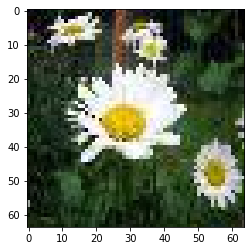

In [11]:
# Example of a picture
#(X: image, y: 0(non-cat) / 1(cat))
index = np.random.randint(0, 200, dtype=int)
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

## <font color="blue"> Question 1

**문제:** 아래의 값에 적당한 값을 할당하시오:
- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

**hint:** `train_set_x_orig.shape` = (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [12]:
train_set_x_orig.shape[0] #(데이터개수, 픽셀값, 픽셀값, 채널개수)

200

In [13]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0] #training 데이터개수
m_test = test_set_x_orig.shape[0] #test 데이터개수
num_px = train_set_x_orig.shape[2]#세로(height)픽셀개수. 가로(width)픽셀개수인[1]도 된다
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 200
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (200, 64, 64, 3)
train_set_y shape: (1, 200)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**값이 오른쪽 table과 같다면 정답입니다**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 200 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>


### 2-3) data preprocess 
데이터 전처리
#### 1> flatten

image dataset은 4d array, 즉 4차원 배열이다 (200, 64, 64, 3)

image 자체는 3d array이지만 이를 딥러닝 모델 안에 넣으려면 1d array꼴로 만들어야 넣을 수 있습니다.

그래서 (num_px, num_px, 3)에서 (num_px $*$ num_px $*$ 3, 1)꼴로 만들어야 합니다. 3주차에 배운 numpy 함수로 구현해봅니다.

## <font color="blue"> Question 2

**문제:** training and test data sets을 reshape해서 images of size (num_px, num_px, 3)가 (num\_px $*$ num\_px $*$ 3, 1) 형태로 되게 한다.

**hint:** A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [20]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
#(200, 64, 64,3)을 (200, 12288)로 변형
#그 후 feature가 행에 오고 데이터개수가 열에 오도록 transpose
#(n_x, m)형태로 변형 가능
train_set_x_flatten = train_set_x_flatten.reshape(train_set_x_flatten.shape[0], -1).T
test_set_x_flatten = test_set_x_flatten.reshape(test_set_x_flatten.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (200, 12288)
train_set_y shape: (1, 200)
test_set_x_flatten shape: (50, 12288)
test_set_y shape: (1, 50)


**값이 오른쪽 table과 같다면 정답입니다**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 200)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 200)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
</table>

#### 2> normalization

image의 pixel 값은 모두 0~255의 값을 가집니다.

경험적으로 이미지 픽셀값의 범위를 0~1로 만들면 학습이 잘 됩니다. 

좀 더 자세한 사항은 7주차에 안내하겠습니다. 그 때는 이미지 말고 csv파일도 normalize 해보는 구체적인 방법도 배울 수 있습니다.

In [21]:
#이미지의 경우 0~255픽셀 값을 갖는다.
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.


In [22]:
print(train_set_x)

[[0.84313725 0.85098039 0.83921569 ... 0.78431373 0.83921569 0.89019608]
 [0.76078431 0.68235294 0.58823529 ... 0.65098039 0.59215686 0.57254902]
 [0.84313725 0.79215686 0.90980392 ... 0.28627451 0.25882353 0.21960784]
 ...
 [0.1254902  0.10588235 0.12156863 ... 0.15294118 0.23921569 0.28235294]
 [0.75294118 0.6745098  0.56862745 ... 0.74901961 0.65882353 0.5372549 ]
 [0.23137255 0.19215686 0.15686275 ... 0.61568627 0.52941176 0.20392157]]


<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Normalize" the data

---

## 3. General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

----------

## 4. Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. loop:
    - Calculate current loss (forward propagation)
    - Compute cost function
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

위 3가지 과정을 있다가 밑에서 `model()`이라는 함수에서 한 번에 진행합니다.

이를 위해서는 `model()` 함수에 들어갈 부품들을 차례차례 만들어봅니다. 딥러닝의 5가지 step을 떠올려보면서 진행해도 좋습니다.

### 4-0) Build sigmoid function

## <font color="blue"> Question 3

**문제:** 아래 식을 갖는 `sigmoid()`함수를 만들어보시오.
- $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. 
- np.exp()를 사용해서 만들어보시오.

In [ ]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [ ]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**값이 오른쪽 table과 같다면 정답입니다**:  

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4-1) Initializing parameters

## <font color="blue"> Question 4

**Exercise:** 함수 내부에 있는 주석에 맞게 parameter를 initialization 하시오.
- w는 np.zeros()를 사용해서 initialization 하시오. (dim이라는 해당 함수의 parameter를 사용하시오.)
- b는 0을 대입하시오.

In [27]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    W벡터의 크기(길이)를 의미함
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) - 편향값
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1)) #parameter로 받았던 [dimx1]크기로 weight값을 0으로 초기화
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [28]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**값이 오른쪽 table과 같다면 정답입니다**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

### 4-2) Forward and Backward propagation

위에서 parameter initialization하는 함수를 만들었으니 다음 step을 진행하는 함수를 만든다.

## <font color="blue"> Question 5

**문제:** cost function과 gradient를 계산하고 있는 `propagate()`함수를 완성하시오.

**hints**: 아래 식들을 numpy를 통해 구현하시오. (이 식을 외우지 않아도 됩니다. 구현할 줄만 알면 됩니다.)
- (forward propagation) $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- (compute cost function) $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

- Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [ ]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A =  sigmoid()                                                             # compute activation
    cost =                                                                     # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)

    #dJ/dW의 약자
    dw = 

    
    db = 
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

**값이 오른쪽 table과 같다면 정답입니다**: 

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### 4-3) Optimization (Gradient descent)
 
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

## <font color="blue"> Question 6

**Exercise:** gradient descent 식을 완성한다.
    
**hint:** For a parameter $w$, the update rule is $ w = w - \alpha \text{ } dw$, where $\alpha$ is the learning rate.
    

In [ ]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate()
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w =
        b = 
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

**값이 오른쪽 table과 같다면 정답입니다**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.19033591] 
     [ 0.12259159]] </td>
    </tr>
    <tr>
       <td> **b** </td>
       <td> 1.92535983008 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.67752042]
 [ 1.41625495]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.219194504541 </td>
    </tr>

</table>

## <font color="blue"> Question 7

이전 `optimize()` 함수는 학습된 w와 b를 출력한다. 이제는 이 w와 b로 x(image)의 y(label)를 예측해야한다.    
    
**문제:** 아래 조건을 만족하는 `predict()`함수를 완성하시오. 

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. A의 각 원소들을 0 (if activation <= 0.5) 또는 1 (if activation > 0.5) 변환하고, 이 값들을 `Y_prediction` vector에 할당하시오. 
    
**hint:** If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [ ]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture

    #sigmoid함수값
    ### START CODE HERE ### (≈ 1 line of code)
    A = 
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        
        
        
        
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

**값이 오른쪽 table과 같다면 정답입니다**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.  0.]]
         </td>  
   </tr>

</table>


<font color='blue'>
**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

---------

## 5. Merge all functions into a model ##

### 5-1) training & test model

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

## <font color="blue"> Question 8

**문제:** 아래 조건을 만족하는 `model()`함수를 완성하시오.
- Y_prediction_test for your predictions on the test set
- Y_prediction_train for your predictions on the train set
- w, costs, grads for the outputs of optimize()
    
**hint:** 기존에 위에서 만든 함수들을 여기서 합쳐서 Neural Network(모델)를 만듭니다.

In [ ]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = 

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = 
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = 
    Y_prediction_train =

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.0025, print_cost = True)

**값이 오른쪽 table과 같다면 정답입니다**: 

<table style="width:40%"> 
    <tr>
        <td> **Cost after iteration 0**  </td> 
        <td> 0.693147 </td>
    </tr>
      <tr>
        <td> <center> $\vdots$ </center> </td> 
        <td> <center> $\vdots$ </center> </td> 
    </tr>  
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 99.0 % </td>
    </tr>
    <tr>
        <td>**Test Accuracy** </td> 
        <td> 82.0 % </td>
    </tr>
</table> 




Let's also plot the cost function and the gradients.

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**생각해보기:**
- training accuracy는 100%에 가깝습니다.
- test accuracy는 82%입니다.
- 이 모델은 좋은 모델일까요? 
- 지금 현상을 뭐라고 할까요? 궁금하신 분은 'overfitting'을 검색해보셔도 좋습니다. 이는 5주차에 배웁니다.

매주마다 점차 더 깊은 모델에 도전해봅니다.

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations(3000으로) in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called **overfitting.** 

### 5-2) test set 하나씩 test

In [ ]:
# Example of a picture that was wrongly classified.
index = 2
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[:,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

-------

## (Bonus) 6. Test with your own image (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:
   1. 여러분의 이미지를 "images" 폴더 안에 넣습니다.
   2. 그 이미지의 이름을 "my_image.jpg"로 설정합니다. (확장자가 png 등이면 실행 불가 / 반드시 jpg여야 합니다.)
   3. 코드를 실행하면 여러분의 이미지가 고양이인지 판별합니다.(1 = cat, 0 = non-cat)!

In [ ]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "my_image.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = pilimg.open(fname)
image = np.array(image)
image = image/255.
my_image = cv2.resize(image, dsize=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

<font color='blue'>
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!

Finally, if you'd like, we invite you to try different things on this Notebook. Make sure you submit before trying anything. Once you submit, things you can play with include:
    - Play with the learning rate and the number of iterations
    - Try different initialization methods and compare the results
    - Test other preprocessings (center the data, or divide each row by its standard deviation)

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c